In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [12]:
os.environ['TAVILY_API_KEY']='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'

In [13]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-120b")
llm 

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000002C6304C6030>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002C6304C6480>, model_name='openai/gpt-oss-120b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
pip install langchain_tavily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: c:\Users\PARAS\Downloads\agentic-ai-langraph\.venv\Scripts\python.exe -m pip install --upgrade pip


In [15]:
from typing import Annotated
from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from langchain_community.utilities import WikipediaAPIWrapper

import os 
from  typing import List
from pydantic import BaseModel
from langchain_groq.chat_models import ChatGroq
from langchain_core.documents import Document
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders  import TextLoader

In [16]:
tavily_tool=TavilySearch(max_results=5)

In [17]:
from langchain_community.document_loaders import TextLoader
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_core.tools import Tool

def make_retriever_tool(file: str, name: str, desc: str) -> Tool:
    # Load documents
    docs = TextLoader(file, encoding="utf-8").load()
    
    # Split into chunks
    splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    chunks = splitter.split_documents(docs)
    
    # Build vectorstore
    vectorstore = FAISS.from_documents(chunks, HuggingFaceEmbeddings())
    retriever = vectorstore.as_retriever()
    
    # Define tool function
    def tool_func(query: str) -> str:
        print(f"Using Tool: {name}")
        results = retriever.get_relevant_documents(query)
        return "\n\n".join(doc.page_content for doc in results)
    
    # Return as LangChain Tool
    return Tool(
        name=name,
        description=desc,
        func=tool_func
    )

# Example usage
internal_tool_1 = make_retriever_tool(
    "research_notes.txt",
    "internalResearchNotes",
    "Search internal research notes for experimental results"
)
internal_tool_1

Loading weights: 100%|██████████| 199/199 [00:00<00:00, 729.64it/s, Materializing param=pooler.dense.weight]                        
MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Tool(name='internalResearchNotes', description='Search internal research notes for experimental results', func=<function make_retriever_tool.<locals>.tool_func at 0x000002C650532E80>)

In [18]:
def get_next_node(last_message:BaseModel,goto:str):
    if "FINAL ANSWER" in last_messages.content:
        return END
    return goto

In [19]:
def make_system_prompt(suffix:str)->str:
    return (
        "You are a helpful AI Assiistant collborating with other assistants",
        "Use the providede tools to prgress towards answering the questions",
        "I you are unable to fully answer,Thats ok,another assistant with different tools",
        "Will help where you left off .Exectue what you can to make progress",
        "If you or any of other assistants have the final answer or deliverable",
        "prfix your response with final asnwer so the team knows to stop"
    )

In [20]:
import os
from langchain_groq.chat_models import ChatGroq
os.environ['GROQ_API_KEY']=os.getenv("GROQ_API_KEY")
from dotenv import load_dotenv
load_dotenv()
llm=ChatGroq(model='openai/gpt-oss-120b')

In [22]:
from langchain_core.prompts import PromptTemplate
from langgraph.prebuilt import create_react_agent



# Define a proper prompt template
prompt = PromptTemplate(
    input_variables=["input", "agent_scratchpad", "tools", "tool_names"],
    template="""You are a research-only agent.
You can only do research tasks using the provided tools.

Question: {input}
Tools: {tools}
Tool Names: {tool_names}
Scratchpad: {agent_scratchpad}
"""
)

# Create the agent
research_agent = create_react_agent(
    llm,
    tools=[internal_tool_1,tavily_tool],
    prompt=prompt
)

C:\Users\PARAS\AppData\Local\Temp\ipykernel_28940\2748016538.py:20: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  research_agent = create_react_agent(


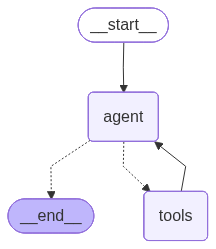

In [23]:
research_agent

In [34]:
#Reseach Node
from langgraph.graph import StateGraph, END
from typing import Literal
from langchain_core.messages import AnyMessage
from langgraph.types import Command

# Define your state type
class MessageState(dict):
    messages: list[AnyMessage]

# Define the node
def research_node(state: MessageState) -> Command[Literal["blog_generation", END]]:
    result = research_agent.invoke(state["messages"])
    # Decide what to do next
    return Command(
        goto="blog_generation",  # or END depending on your workflow
        update={"messages": result}
    )

In [35]:
internal_tool_1

Tool(name='internalResearchNotes', description='Search internal research notes for experimental results', func=<function make_retriever_tool.<locals>.tool_func at 0x000002C650532E80>)

In [36]:
tavily_tool

TavilySearch(max_results=5, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))

In [37]:
from langchain_tavily import TavilySearch
web_search=TavilySearch(max_results=3)
web_search

TavilySearch(max_results=3, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))

In [42]:
web_search

TavilySearch(max_results=3, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))

In [43]:
from langgraph.prebuilt import create_react_agent
research_agent=create_react_agent(
    model=llm,
    tools=[web_search,internal_tool_1],
    prompt=(
        "You are a research Agent"
        "INstructions"
        "Assist ONLY with research realted tasks DO NOT do any math"
        "After  youre done  with your tasks respond to the supervisor director"
        "Respond ONLY with the  results of your work do NOT INlcude ANY other text "
    )
)

C:\Users\PARAS\AppData\Local\Temp\ipykernel_28940\4120572853.py:2: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  research_agent=create_react_agent(


In [47]:
def add(a:float,b:float):
    "Add two numbers"
    return a+b
def multiply(a:float,b:float):
    "Multiply two number "
    return a*b
def divide(a:float,b:float):
    "divide two number "
    return a/b

math_agent=create_react_agent(
    model=llm,
    tools=[add,multiply,divide],
    prompt=(
        "You are a research Agent"
        "INstructions"
        "Assist ONLY with research realted tasks DO NOT do any math"
        "After  youre done  with your tasks respond to the supervisor director"
        "Respond ONLY with the  results of your work do NOT INlcude ANY other text "
    ),
    name="math_agent"

    
)

C:\Users\PARAS\AppData\Local\Temp\ipykernel_28940\1346300853.py:11: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  math_agent=create_react_agent(


In [52]:
pip install langchain_supervisor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement langchain_supervisor (from versions: none)

[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: c:\Users\PARAS\Downloads\agentic-ai-langraph\.venv\Scripts\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for langchain_supervisor


In [68]:
from langgraph_supervisor import create_supervisor

# Make sure each agent has a name
# research_agent = create_react_agent(
#     llm,
#     tools=[internal_tool_1, tavily_tool],
#     prompt=prompt,
#     name="research_agent"
# )

# math_agent = create_react_agent(
#     llm,
#     tools=[math_agent],
#     prompt=prompt,
#     name="math_agent"
# )

# Pass them as a list, not a dict
supervisor = create_supervisor(
    model=llm,
    agents=[research_agent, math_agent],
    prompt=(
        "You are a supervisor managing two agents:\n"
        "- A research agent\n"
        "- A math agent\n"
        "Assign work to one agent only.\n"
        "Do not do any work yourself."
    ),
    add_handoff_back_messages=True,
    output_mode="full_history"
).compile(name="Supervisor")


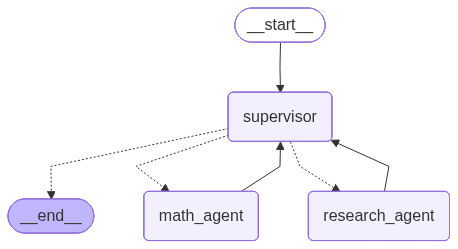

In [69]:
supervisor

In [77]:
response = supervisor.invoke({"input": "List all the transformers variants in the production"})
print(response)

{'messages': [AIMessage(content='Sure! What task would you like assistance with—research or a math problem?', additional_kwargs={'reasoning_content': 'The user hasn\'t asked a question yet. The system says we are a supervisor managing two agents: research and math. We must assign work to one agent only. Do not do any work ourselves. So we need to respond by delegating to either the math or research agent, based on the request. But the user hasn\'t asked anything yet. Possibly the next user message will be a request. But currently we need to respond? The instruction says "You are a supervisor managing two agents... Assign work to one agent only. Do not do any work yourself." So we need to wait for user request? Perhaps we should ask the user what they need? But that would be doing work ourselves. However asking clarifying question is not "work". It\'s a request for clarification. But likely the user will ask a question next. For now, we should respond asking for the user\'s request? Or 

In [85]:
response['messages']

[AIMessage(content='Sure! What task would you like assistance with—research or a math problem?', additional_kwargs={'reasoning_content': 'The user hasn\'t asked a question yet. The system says we are a supervisor managing two agents: research and math. We must assign work to one agent only. Do not do any work ourselves. So we need to respond by delegating to either the math or research agent, based on the request. But the user hasn\'t asked anything yet. Possibly the next user message will be a request. But currently we need to respond? The instruction says "You are a supervisor managing two agents... Assign work to one agent only. Do not do any work yourself." So we need to wait for user request? Perhaps we should ask the user what they need? But that would be doing work ourselves. However asking clarifying question is not "work". It\'s a request for clarification. But likely the user will ask a question next. For now, we should respond asking for the user\'s request? Or we could just